# Movie Sentiment Analysis

### Import the Libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Importing the dataset

In [4]:
df = pd.read_csv('./movie.csv')

In [5]:
df.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [6]:
df.columns = ["review","sentiment"]

In [7]:
df.head()

,review,sentiment
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


### Data Analysis

In [8]:
df.shape

(40000, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     40000 non-null  object
 1   sentiment  40000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 625.1+ KB


In [10]:
df.describe()

,sentiment
count,40000.000000
mean,0.499525
std,0.500006
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [11]:
df['sentiment'].unique()

array([0, 1])

In [12]:
df['sentiment'].value_counts()

0    20019
1    19981
Name: sentiment, dtype: int64

/home/fnp/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sentiment', ylabel='count'>

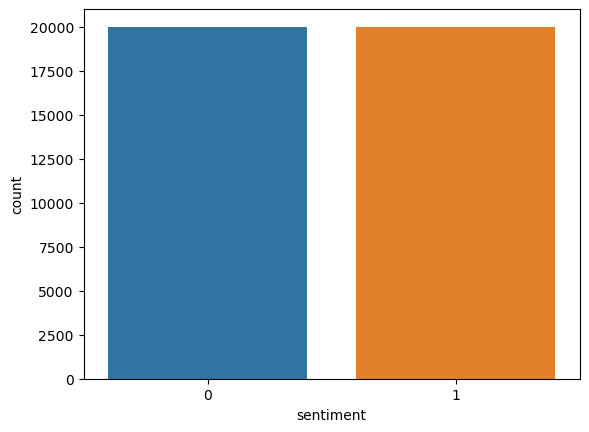

In [13]:
import seaborn as sns
sns.countplot(df['sentiment'])

### Taking care of missing data

In [14]:
# check for empty Data

df.isnull()

,review,sentiment
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
39995,False,False
39996,False,False
39997,False,False
39998,False,False


In [15]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

##### This dataset does not have any empty elements  

In [16]:
#Removal of any Duplicate rows

df = df.drop_duplicates()

In [17]:
df.shape

(39723, 2)

In [18]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

### Removing Stopwords, Apply stemming

In [19]:
"""import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
corpus = []
ps = PorterStemmer()
for i in range(df.shape[0]):
    print(i)
    text = df['review'][i]
    text = text.lower()
    text = text.split()
    text = [PorterStemmer().stem(word) for word in text if word in set(stopwords.words('english'))]
    text = "".join(text)
    corpus.append(text) """
df.reset_index(drop=True, inplace=True)
import nltk
import string
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

def preprocessor(text):
    text = text.lower()
    text = ''.join([i for i in text if i in string.ascii_lowercase+' '])
    text = ' '.join([PorterStemmer().stem(word) for word in text.split()])
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])
    return text

for i in tqdm(range(df.shape[0])):
    df.loc[i,'review'] = preprocessor(df['review'][i])

100%|█████████████████████████████████████| 39723/39723 [07:43<00:00, 85.64it/s]


In [21]:
df['review'].head()

0    grew b watch love thunderbird mate school watc...
1    put thi movi dvd player sat coke chip expect w...
2    whi peopl know particular time past wa like fe...
3    even though great interest biblic movi wa bore...
4    im die hard dad armi fan noth ever chang got t...
Name: review, dtype: object

### Apply Tf-idfVectorizer to make text data into vectors

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
x = cv.fit_transform(df['review'])

In [23]:
x.shape

(39723, 120614)

In [40]:
print(x)

  (0, 55002)	0.11743697074564897
  (0, 33002)	0.10689673206554998
  (0, 49707)	0.07414602204447646
  (0, 102148)	0.18948291926534813
  (0, 90968)	0.3407577812892521
  (0, 48633)	0.15127486202390392
  (0, 63854)	0.1633281620937982
  (0, 87433)	0.09410648967590192
  (0, 448)	0.08035323380467174
  (0, 64668)	0.05649376102974374
  (0, 87151)	0.08529592684898044
  (0, 17011)	0.09675101238279087
  (0, 89793)	0.0984251929313996
  (0, 112802)	0.09495671732294313
  (0, 36636)	0.02666792435400927
  (0, 115334)	0.06256265153437446
  (0, 48848)	0.11317447841587441
  (0, 20846)	0.057037284736249784
  (0, 113538)	0.06686406536502132
  (0, 17085)	0.1061597897457962
  (0, 27516)	0.05124508459098755
  (0, 45333)	0.0647332632873924
  (0, 38869)	0.1614960231969528
  (0, 54737)	0.18948291926534813
  (0, 23011)	0.06776037721727174
  :	:
  (39722, 54612)	0.1006941243210753
  (39722, 91331)	0.06644696723338143
  (39722, 6951)	0.12999258300366107
  (39722, 27060)	0.10010765010942825
  (39722, 48954)	0.1068613

### Splitting the DataSet into the Training Set and Test Set

In [41]:
y = df.sentiment

In [42]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

### Training the Logistic Regression model on the Training set

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [44]:
y_pred = classifier.predict(x_test)

In [45]:
y_test

28240    1
10146    1
5266     1
22323    1
29927    0
        ..
21723    1
10947    0
14409    0
13931    0
37929    0
Name: sentiment, Length: 7945, dtype: int64

In [46]:
y_pred

array([1, 0, 1, ..., 1, 0, 0])

### Making Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)*100

[[3586  498]
 [ 362 3499]]


89.17558212712397

In [48]:
def MovieSentimentAnalysis(inputtext):
    # remove stopwords and apply stemming
    print(inputtext)
    text = preprocessor(inputtext)
    print(text)
    text = [text]
    x = cv.transform(text)
    print(x)
    result = classifier.predict(x)
    
    if result == 1:
        print("Positive Review")
    else:
        print("Negative Review")

In [60]:
MovieSentimentAnalysis("worst Film")

worst Film
worst film
  (0, 118476)	0.9131113184152388
  (0, 36636)	0.4077103385762795
Negative Review
